# Decision Trees: Regression

In [1]:
import numpy as np
import pandas as pd

## Creating Height Dataset

In [3]:
import numpy as np
import pandas as pd

n = 200

height_pop1_f = np.random.normal(loc=155, scale=4, size=n)
height_pop1_m = np.random.normal(loc=175, scale=5, size=n)
height_pop2_f = np.random.normal(loc=165, scale=15, size=n)
height_pop2_m = np.random.normal(loc=185, scale=12, size=n)

height_f = np.concatenate([height_pop1_f, height_pop2_f])
height_m = np.concatenate([height_pop1_m, height_pop2_m])

df_height = pd.DataFrame(
    {
        'Gender': [1 for i in range(height_f.size)] + [2 for i in range(height_m.size)],
        'Height': np.concatenate((height_f, height_m))
    }
)

# df_height['Gender (text)'] = df_height['Gender'].apply(lambda g: {1: 'F', 2: 'M'}.get(g, 'N/A'))

In [4]:
df_height.sample(3)

,Gender,Height
252,1,195.379347
716,2,181.509895
134,1,163.911061


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


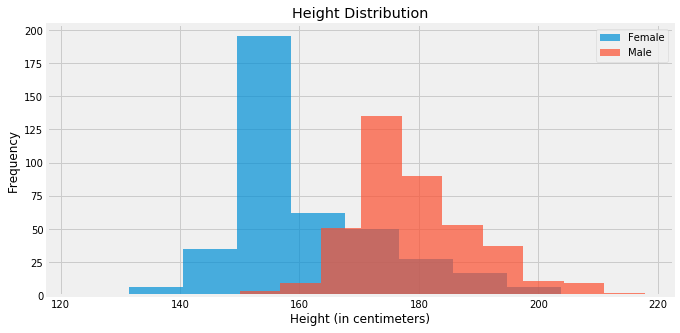

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

df_height[df_height['Gender'] == 1]['Height'].plot(
    label='Female', kind='hist', 
    bins=10, alpha=0.7, ax=ax
)
df_height[df_height['Gender'] == 2]['Height'].plot(
    label='Male', kind='hist', 
    bins=10, alpha=0.7, ax=ax
)

# ax.set_xlim(140, 200)
ax.legend()
ax.set_title('Height Distribution')
ax.set_xlabel('Height (in centimeters)')

fig.show()

In [6]:
# df_height['Gender (text)'] = df_height['Gender'].apply(lambda g: {1: 'F', 2: 'M'}.get(g, 'N/A'))

df_height.groupby('Gender')[['Height']].agg([np.mean, np.median]).round(1)

Height       
         mean median
Gender              
1       160.9  157.0
2       179.4  177.3

##  Splitting Data then applying the Regressor

In [7]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_height, test_size=0.3, random_state=22)

x_train = df_train[['Gender']]
x_test  = df_test[['Gender']]

y_train = df_train['Height']
y_test  = df_test['Height']

from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()

clf.fit(x_train, y_train)



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [8]:
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error, mean_absolute_error


for criterion in ['mse', 'mae']:
    rgrsr = DecisionTreeRegressor(criterion=criterion)
    rgrsr.fit(x_train, y_train)

    print(f'\ncriterion={criterion}:\n')
    print(export_text(rgrsr, feature_names=['Gender'], spacing=3, decimals=1))
    
    y_test_pred = rgrsr.predict(x_test)
    
    print('MSE:', round(mean_squared_error(y_test, y_test_pred), 1))
    print('MAE:', round(mean_absolute_error(y_test, y_test_pred), 1))


criterion=mse:

|--- Gender <= 1.5
|   |--- value: [160.8]
|--- Gender >  1.5
|   |--- value: [179.7]

MSE: 131.8
MAE: 8.8

criterion=mae:

|--- Gender <= 1.5
|   |--- value: [157.2]
|--- Gender >  1.5
|   |--- value: [177.7]

MSE: 140.3
MAE: 8.1


In [9]:
y_train

230    189.715860
140    149.980960
172    150.570729
782    193.298542
406    172.337001
          ...    
491    172.981764
502    180.858260
358    167.625938
356    157.478166
132    154.342254
Name: Height, Length: 560, dtype: float64

In [10]:
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error, mean_absolute_error


for who_gets_more_weight in ['below 150', 'above 150']:
    rgrsr = DecisionTreeRegressor(criterion='mse')
    if who_gets_more_weight == 'below 150':
        sample_weight = y_train.apply(lambda h: 10 if h <= 150 else 1)
    else:
        sample_weight = y_train.apply(lambda h: 10 if h > 150 else 1)
    rgrsr.fit(x_train, y_train, sample_weight=sample_weight)

    print(f'\nEmphasis on {who_gets_more_weight}:\n')
    print(export_text(rgrsr, feature_names=['Gender'], spacing=3, decimals=1))
    
    y_test_pred = rgrsr.predict(x_test)
    
    print('MSE:', round(mean_squared_error(y_test, y_test_pred), 1))
    print('MAE:', round(mean_absolute_error(y_test, y_test_pred), 1))


Emphasis on below 150:

|--- Gender <= 1.5
|   |--- value: [152.7]
|--- Gender >  1.5
|   |--- value: [179.7]

MSE: 170.5
MAE: 9.0

Emphasis on above 150:

|--- Gender <= 1.5
|   |--- value: [162.6]
|--- Gender >  1.5
|   |--- value: [179.7]

MSE: 132.7
MAE: 9.1
